In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import csv

pd.options.display.max_colwidth = 256

In [5]:
base_name = "/home/alcoufr/Documents/Papiers/ROBOVIS"
truc = ['ROBOVIS_Elephant_zun_bakedUV_init_views_0']
# folders = ['ROBOVIS_Elephant_zun_bakedUV_test_10', 'ROBOVIS_Elephant_zun_bakedUV_test_101_mean_quad']
folders = ['ROBOVIS_Elephant_zun_bakedUV_test_101_v2_mean_quad']
nb_iter = [8]

In [6]:
def aggregate_extrinsic_results(base_name, folder_name, nb_iter):
    df = pd.DataFrame()
    for i in range(nb_iter):
        filename = f"pointcloud{i}_extrinsic_results.csv"
        path = os.path.join(base_name, folder_name, 'metrics', filename)
        temp_df = pd.read_csv(path)
        df = pd.concat([df, temp_df])
    return df

In [7]:
toto = dict()
for f, it in zip(folders, nb_iter):
    toto[f] = aggregate_extrinsic_results(base_name, f, it)

print(toto)

{'ROBOVIS_Elephant_zun_bakedUV_test_101_v2_mean_quad':    Unnamed: 0  Middlebury Completeness  Middlebury Accuracy  MSDM2 : R->M  \
0           0                 0.787242             0.004952      0.546631   
0           0                 0.828553             0.004916      0.539515   
0           0                 0.856742             0.005011      0.526559   
0           0                 0.862960             0.005029      0.522983   
0           0                 0.865589             0.005031      0.523511   
0           0                 0.876653             0.005060      0.522150   
0           0                 0.878359             0.005063      0.520654   
0           0                 0.879556             0.005061      0.518468   

   MSDM2 : M->R  MSDM : R->M  MSDM : M->R  
0      0.631756     0.513267     0.635550  
0      0.624257     0.493341     0.600461  
0      0.622427     0.480349     0.571911  
0      0.624380     0.491053     0.580139  
0      0.619815     0.489449   

In [8]:
def plot_histogram_quality(base_name, folder_name, nb_iter):
    prout = list()
    fig, ax = plt.subplots(figsize =(10, 7))
    for it in range(nb_iter):
        filename = f"pointcloud{it}_mean_quad_roughness_50.qlt"
        full_filename = os.path.join(base_name, folder_name, "metrics", filename)
        test = pd.read_csv(full_filename, header=None)
        prout.append(test.mean())
    # print(prout)
    ax.plot(prout)

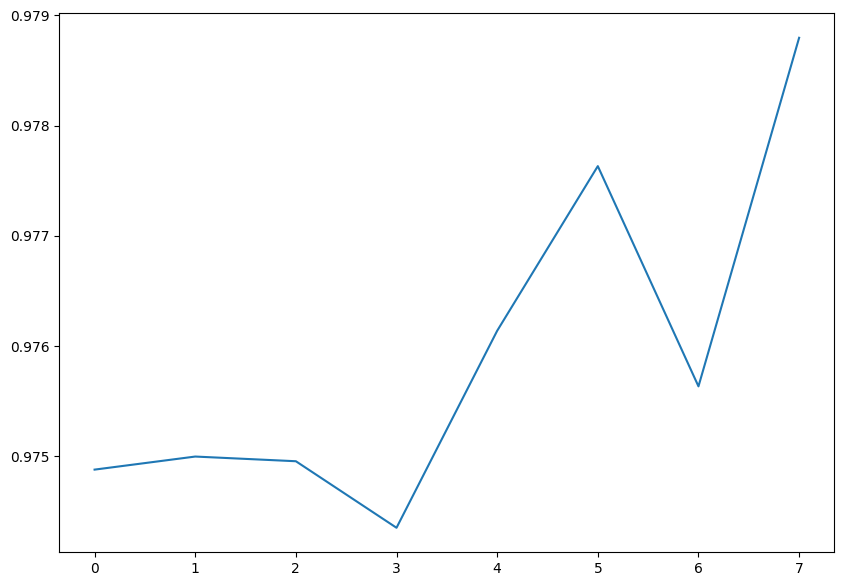

In [9]:
for f, it in zip(folders, nb_iter):
    plot_histogram_quality(base_name,f,it)

In [10]:
def plot_shame_curves(df, title):
    fig,axs = plt.subplots(2,3,layout="constrained", figsize=[15,10])
    fig.suptitle(title)
    axs[0][0].plot(range(1,len(df.index)+1), df['Middlebury Completeness'], label="Middleburry Completeness")
    axs[0][0].set_xticks(range(1,11,1))
    axs[0][0].set_yticks(0.1*np.array(range(0,11,1)))
    axs[0][1].plot(range(1,len(df.index)+1), df['Middlebury Accuracy'], label="Middleburry Accuracy")
    axs[0][1].set_xticks(range(1,11,1))
    axs[0][1].set_yticks(0.1*np.array(range(0,11,1)))
    axs[0][2].plot(range(1,len(df.index)+1), df['MSDM2 : R->M'], label="MSDM2 : R->M")
    axs[0][2].set_xticks(range(1,11,1))
    axs[0][2].set_yticks(0.1*np.array(range(0,11,1)))
    axs[1][0].plot(range(1,len(df.index)+1), df['MSDM2 : M->R'], label="MSDM2 : M->R")
    axs[1][0].set_xticks(range(1,11,1))
    axs[1][0].set_yticks(0.1*np.array(range(0,11,1)))
    axs[1][1].plot(range(1,len(df.index)+1), df['MSDM : R->M'], label="MSDM : R->M")
    axs[1][1].set_xticks(range(1,11,1))
    axs[1][1].set_yticks(0.1*np.array(range(0,11,1)))
    axs[1][2].plot(range(1,len(df.index)+1), df['MSDM : M->R'], label="MSDM : M->R")
    axs[1][2].set_xticks(range(1,11,1))
    axs[1][2].set_yticks(0.1*np.array(range(0,11,1)))
    axs[0][0].legend()
    axs[0][1].legend()
    axs[0][2].legend()
    axs[1][0].legend()
    axs[1][1].legend()
    axs[1][2].legend()
    plt.savefig(os.path.join(base_name,title,f"Shame_curves.png"))
    plt.close()

In [11]:
def plot_shame_curves_normed(df, title):
    fig,axs = plt.subplots(2,3,layout="constrained", figsize=[15,10])
    fig.suptitle(title)
    axs[0][0].plot(range(1,len(df.index)+1), df['Middlebury Completeness'], label="Middleburry Completeness")
    axs[0][0].set_xticks(range(1,len(df.index)+1))
    axs[0][1].plot(range(1,len(df.index)+1), df['Middlebury Accuracy'], label="Middleburry Accuracy")
    axs[0][1].set_xticks(range(1,len(df.index)+1))
    axs[0][2].plot(range(1,len(df.index)+1), df['MSDM2 : R->M'], label="MSDM2 : R->M")
    axs[0][2].set_xticks(range(1,len(df.index)+1))
    axs[1][0].plot(range(1,len(df.index)+1), df['MSDM2 : M->R'], label="MSDM2 : M->R")
    axs[1][0].set_xticks(range(1,len(df.index)+1))
    axs[1][1].plot(range(1,len(df.index)+1), df['MSDM : R->M'], label="MSDM : R->M")
    axs[1][1].set_xticks(range(1,len(df.index)+1))
    axs[1][2].plot(range(1,len(df.index)+1), df['MSDM : M->R'], label="MSDM : M->R")
    axs[1][2].set_xticks(range(1,len(df.index)+1))
    axs[0][0].legend()
    axs[0][1].legend()
    axs[0][2].legend()
    axs[1][0].legend()
    axs[1][1].legend()
    axs[1][2].legend()
    plt.savefig(os.path.join(base_name,title,f"Shame_curves_normed.png"))
    plt.close()

In [12]:
def plot_second_shame_curves(df, title):
    fig,axs = plt.subplots(1,4,layout="constrained", figsize=[20,5])
    fig.suptitle(title)
    axs[0].plot(range(1,len(df.index)+1), df['Middlebury Completeness'], label="Middleburry Completeness")
    axs[1].plot(range(1,len(df.index)+1), df['Middlebury Accuracy'], label="Middleburry Accuracy")
    axs[2].plot(range(1,len(df.index)+1), (df['MSDM2 : R->M'] +df['MSDM2 : R->M']), label="MSDM2")
    axs[3].plot(range(1,len(df.index)+1), (df['MSDM : R->M']+df['MSDM : M->R']), label="MSDM")
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[3].legend()
    plt.savefig(os.path.join(base_name,title,f"Shame_curves2.png"))
    plt.close()

In [13]:
def plot_second_shame_curves_normed(df, title):
    fig,axs = plt.subplots(1,4,layout="constrained", figsize=[20,5])
    fig.suptitle(title)
    axs[0].plot(range(1,len(df.index)+1), df['Middlebury Completeness'], label="Middleburry Completeness")
    axs[0].set_xticks(range(1,11,1))
    axs[0].set_yticks(0.1*np.array(range(0,11,1)))
    axs[1].plot(range(1,len(df.index)+1), df['Middlebury Accuracy'], label="Middleburry Accuracy")
    axs[1].set_xticks(range(1,11,1))
    axs[1].set_yticks(0.1*np.array(range(0,11,1)))
    axs[2].plot(range(1,len(df.index)+1), (df['MSDM2 : R->M'] +df['MSDM2 : R->M']), label="MSDM2")
    axs[2].set_xticks(range(1,11,1))
    axs[2].set_yticks(0.1*np.array(range(0,11,1)))
    axs[3].plot(range(1,len(df.index)+1), (df['MSDM : R->M']+df['MSDM : M->R']), label="MSDM")
    axs[3].set_xticks(range(1,11,1))
    axs[3].set_yticks(0.1*np.array(range(0,11,1)))
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[3].legend()
    plt.savefig(os.path.join(base_name,title,f"Shame_curves2_normed.png"))
    plt.close()

In [14]:
for i, elt in enumerate(toto):
    plot_shame_curves(toto[elt], elt)
    plot_shame_curves_normed(toto[elt], elt)
    plot_second_shame_curves(toto[elt], elt)
    plot_second_shame_curves_normed(toto[elt], elt)

array([[<Axes: title={'center': '0.9976557262802173'}>]], dtype=object)

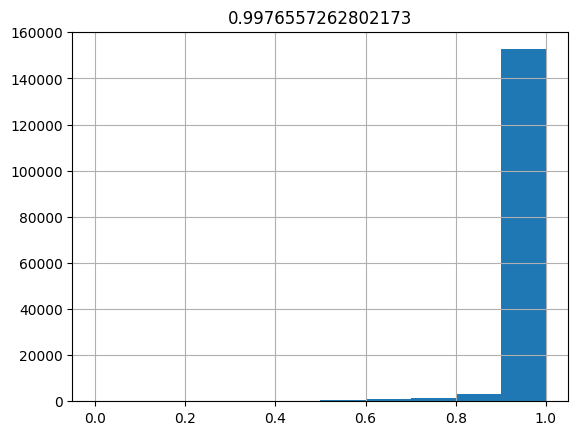

In [16]:
file = "/home/alcoufr/Documents/Papiers/ROBOVIS/ROBOVIS_Elephant_zun_bakedUV_test_101_v2_mean_quad/metrics/pointcloud8_mean_quad_roughness_50.qlt"
prout = pd.read_csv(file)
prout.hist()

In [26]:
### Global Parameters
## Sphere with reconstruction with 10
# results_folder = "mediaalcoufrThese_Remyresults_1909"
# nb_iter = 20
# model_name = "sphere_qlt"
# model_number = range(5) # From 0 to 4
# patch_size = [5,6,7] # 4,5,6,7
# method_number = [0, 10, 11, 101] # 0, 10, 11, 101
# rec_iters = [0,0,0,10]

## Sphere with reconstruction 10 on 101 method
# results_folder = "mediaalcoufrThese_Remyresults_1909with_10"
# nb_iter = 20
# model_name = "sphere_qlt"
# model_number = range(5) # From 0 to 4
# patch_size = [5,6,7] # 4,5,6,7
# method_number = [101] # 0, 10, 11, 101
# rec_iters = [10]

## Armadillo with reconstruction with 10
results_folder = "/media/alcoufr/These_Remy/results_0310"
graph_folder = "graphs_v2"
nb_iter = 20
model_name = "armadillo_qlt"
model_number = range(5) # From 0 to 4
patch_size = [4,6,8,10] # 4,5,6,7
method_number = [0, 10, 101] # 0, 10, 11, 101
rec_iters = [0,0,10]

## Armadillo with reconstruction with 10
# results_folder = "homealcoufrdevNBV_baseNBV-Simulation_1ROBOVIS_test"
# nb_iter = 20
# model_name = "armadillo_qlt"
# model_number = [0] # From 0 to 4
# patch_size = [4] # 4,5,6,7
# method_number = [101] # 0, 10, 11, 101
# rec_iters = ["10_10"]

In [27]:
def recover_paths(results_folder, model_name, model_number, method_number, patch_size, rec_iter):
    path_df = pd.DataFrame(columns=['name','method', 'model', 'n_ring', 'path_to_folder', 'path_to_quality', 'path_to_metrics'])
    folder_name = f"{method_number}_{model_number}_{model_name}_{patch_size}_{rec_iter}"
    path_to_folder = os.path.join(results_folder,folder_name)
    path_to_quality = os.path.join(results_folder,folder_name, "quality")
    path_to_metrics = os.path.join(results_folder,folder_name, "metrics")
    path_to_occupancy = os.path.join(results_folder,folder_name, "occupancy")
    path_df = pd.concat([path_df, pd.DataFrame({'name' : [folder_name], 
                                                'method':[method_number],
                                                'model': [model_number],
                                                'n_ring': [patch_size],
                                                'path_to_folder' : [path_to_folder],
                                                'path_to_quality' : [path_to_quality],
                                                'path_to_metrics' : [path_to_metrics],
                                                'path_to_occupancy' : [path_to_occupancy]
    })])
    return path_df

In [28]:
def get_quality_levels(path_df):
    tab_keys = set()
    for iter in range(nb_iter-1,-1,-1):
        file_quality = os.path.join(path_df['path_to_quality'][0],f"quality_{iter}.csv")
        qlt = pd.read_csv(file_quality,header=None)
        tab_keys.update(qlt[0])
    tab_keys = list(tab_keys)
    tab_keys.sort()
    return tab_keys

In [29]:
def get_midd_compl(path_df, metrics_df):
    for iter in range(nb_iter):
        file_ext_met =  os.path.join(path_df['path_to_metrics'][0],f"pointcloud{iter}_extrinsic_results.csv")
        ext_met = pd.read_csv(file_ext_met)
        metrics_df.loc[iter,"middleburry_completeness"] = ext_met["Middlebury Completeness"][0]
    return metrics_df

In [30]:
def get_nb_points_vus(path_df, metrics_df, threshold=0.7):
    for iter in range(nb_iter):
        file_occupancy = os.path.join(path_df['path_to_occupancy'][0], f"occupancy_{iter}.csv")
        occ = pd.read_csv(file_occupancy,header=None)
        nb_points_vus = sum(occ[1][occ[0] >= threshold])
        metrics_df.loc[iter,"occupied_voxels_viewed"] = nb_points_vus
    return metrics_df

In [31]:
def compute_quality_tab(path_df, metrics_df):
    quality_tab = pd.DataFrame(index=range(nb_iter),columns=get_quality_levels(path_df))
    for iter in range(nb_iter):
        file_qlt = os.path.join(path_df['path_to_quality'][0],f"quality_{iter}.csv")
        qlt = pd.read_csv(file_qlt,header=None)
        for i, nb_point in enumerate(qlt[1]):
            quality_tab.loc[iter, qlt[0][i]] = nb_point
    quality_tab = quality_tab.fillna(0)
    return quality_tab

def get_modified_quality_voxels(path_df, quality_tab, metrics_df):
    # Computing the number of points whose quality changed
    tab_keys = get_quality_levels(path_df)
    changed_points = list()
    cumulative_changed_points = list()
    for iter in range(1,nb_iter):
        changed_iter = list()
        for k in range(1,len(tab_keys)-1):
            changed_iter.append(k*(list(quality_tab.loc[iter])[k] - list(quality_tab.loc[iter-1])[k]))
        changed_points.append(sum(changed_iter))
        metrics_df.loc[iter, 'modified_quality_voxels'] = sum(changed_iter)
        cumulative_changed_points.append(sum(changed_points))
        metrics_df.loc[iter, 'cumulative_modified_quality_voxels'] = sum(changed_points)
    metrics_df = metrics_df.fillna(0)
    return metrics_df

In [32]:
def compute_metrics(path_df):
    metrics_df = pd.DataFrame(index=range(nb_iter),columns=['name', 'iter', 'occupied_voxels_viewed', 'middleburry_completeness', 'modified_quality_voxels', 'cumulative_modified_quality_voxels'])
    metrics_df.loc[:,'name'] = path_df['name']
    metrics_df['iter'] = range(nb_iter)
    metrics_df = get_midd_compl(path_df,metrics_df)
    metrics_df = get_nb_points_vus(path_df, metrics_df, 0.7)
    quality_tab = compute_quality_tab(path_df, metrics_df)
    metrics_df = get_modified_quality_voxels(path_df, quality_tab, metrics_df)
    return metrics_df, quality_tab

In [33]:
def plot_std_curves(axs, metrics_df, decalage, width, legend=''):
    if not legend:
        legend = f"Model {metrics_df['name'][0]}"
    axs[0].plot(range(1,nb_iter+1),metrics_df['occupied_voxels_viewed'].to_list(), '-o', label=legend)
    axs[0].set_xticks(range(1,nb_iter+1))
    axs[0].set_title("Occupied Voxels Viewed")
    axs[0].legend()

    axs[1].plot(range(1,nb_iter+1),metrics_df['middleburry_completeness'].to_list(), '-o', label=legend)
    axs[1].set_xticks(range(1,nb_iter+1))
    axs[1].set_title("Middleburry Completeness")
    axs[1].legend()

    axs[2].plot(np.array(range(1,nb_iter+1))+decalage,metrics_df['modified_quality_voxels'].to_list(), 'x')
    axs[2].bar(np.array(range(1,nb_iter+1))+decalage,metrics_df['modified_quality_voxels'].to_list(), label=legend, width=width)
    axs[2].set_xticks(range(1,nb_iter+1))
    axs[2].set_title("Number of modification of the quality at each iteration")
    axs[2].legend()

    axs[3].plot(np.array(range(1,nb_iter+1)),metrics_df['cumulative_modified_quality_voxels'].to_list(), '-o', label=legend)
    axs[3].set_xticks(range(1,nb_iter+1))
    axs[3].set_title("Cumulative number of modification of quality")

    axs[3].legend()
    return axs

In [34]:
def plot_cumulative_bars(ax,quality_tab,glob_quality_metric,colormap_sampled,legend):
    
    bottom = np.zeros(nb_iter)
    for i, col in enumerate(quality_tab[quality_tab.columns[::-1]].drop(columns=[1.0])):
        ax.bar(np.array(range(1,nb_iter+1)), quality_tab[col].to_list(), label = round(col,3), bottom=bottom, color=colormap_sampled[len(quality_tab.columns) - i - 2])
        bottom += quality_tab[col].to_list()
    
    ax.set_xticks(range(1,nb_iter+1))
    ax.set_yticks(range(0,int(quality_tab.drop(columns=[1.0]).sum(axis=1).max()+1)))
    ax.set_title(legend)
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    ax2 = ax.twinx()
    ax2.plot(np.array(range(1,nb_iter+1)),glob_quality_metric,'-x', label = "Global quality function", color='black')
    ax2.set_yticks(0.1 * np.array(range(5,11)))
    ax2.legend(loc="upper right")

In [35]:
def compute_global_quality_metric(quality_tab):
    temp_quality_tab = quality_tab.drop(columns=[1])
    glob_quality_metric = list()
    for i in range(len(temp_quality_tab)):
        elt = temp_quality_tab.iloc[i].to_list()
        if sum(elt) != 0:
            glob_quality_metric.append(sum(elt*temp_quality_tab.columnssum(elt)))
        else:
            glob_quality_metric.append(0)
    if np.isnan(glob_quality_metric).any():
        print(glob_quality_metric)
        print(quality_tab)
        print(temp_quality_tab)
    return glob_quality_metric

# Displaying one test (mono-patch)

A test is defined as :
- A 3D model with a patch germ
- A method
- A patch size
- A number of reconstruction iterations

In [36]:
def display_one_test(results_folder, nb_iter, model_name, model_number, method_number, patch_size, rec_iter, save_folder):
    path_df = recover_paths(results_folder, model_name, model_number, method_number, patch_size, rec_iter)
    metrics_df, quality_tab = compute_metrics(path_df)
    glob_quality_metric = compute_global_quality_metric(quality_tab)

    fig, axs = plt.subplots(1, 5, layout="constrained", figsize=[25,5])
    fig.suptitle(f"Method : {method_number} ; Germ # {model_number} ; 3D model {model_name} ; Patch size {patch_size} ; Rec iteration {rec_iter}", fontsize=25)

    axs = plot_std_curves(axs, metrics_df, 0, 0.9)

    NUM_COLORS = len(quality_tab.columns) - 1
    cm = plt.get_cmap('rainbow')
    colormap_sampled=[cm(1.*iNUM_COLORS) for i in range(NUM_COLORS-1,-1,-1)]

    plot_cumulative_bars(axs[4], quality_tab, glob_quality_metric, colormap_sampled, "Quality state at each iteration")
    plt.savefig(os.path.join(save_folder,f"{method_number}_{model_number}_{model_name}_{patch_size}_{rec_iter}.png"))
    plt.close()

In [37]:
# Save parameters
save_folder = os.path.join(results_folder,graph_folder,"unit_test")
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [38]:
display_one_test(results_folder, nb_iter, model_name, 0, 0, 10, 0, save_folder)

In [39]:
for model in model_number:
    for method, rec_iter in zip(method_number,rec_iters):
        for p_size in patch_size:
            display_one_test(results_folder, nb_iter, model_name, model, method, p_size, rec_iter, save_folder)

# Affichage multi-patch (fixed model, method)

In [40]:
def display_multi_patch_test(results_folder, nb_iter, model_name, model_number, method_number, patch_size, rec_iter, save_folder):
    full_path_df = dict()
    full_metrics_df = dict()
    full_quality_tab_df = dict()
    full_glob_quality_metric = dict()
    for p_size in patch_size:
        full_path_df[p_size] = recover_paths(results_folder, model_name, model_number, method_number, p_size, rec_iter)
        full_metrics_df[p_size], full_quality_tab_df[p_size] = compute_metrics(full_path_df[p_size])
        full_glob_quality_metric[p_size] = compute_global_quality_metric(full_quality_tab_df[p_size])
   
    fig, axs = plt.subplots(1, 4, layout="constrained", figsize=[24,6])
    fig.suptitle(f"Comparison of patch sizes.\n Method: {method_number} ; Model: {model_number} ; Rec_iterations: {rec_iter}", fontsize=25)
    decalage = list(0.5*np.array(range(-len(patch_size),len(patch_size),1))len(patch_size))[1::2]
    NUM_COLORS = len(patch_size)
    cm = plt.get_cmap('rainbow')
    for ax in axs:
        ax.set_prop_cycle(color=[cm(1.*iNUM_COLORS) for i in range(NUM_COLORS-1,-1,-1)])
    for i, p_size in enumerate(patch_size):
        axs = plot_std_curves(axs, full_metrics_df[p_size],decalage[i], width = (1NUM_COLORS) - 1e-2)
    plt.savefig(os.path.join(save_folder,f"{method}_{model}_{model_name}_{rec_iter}.png"))
    plt.close()

    fig,axs = plt.subplots(1, len(patch_size), layout="constrained", figsize=[24,6])
    fig.suptitle(f"Comparison of patch sizes.\n Method: {method_number} ; Model: {model_number} ; Rec_iterations: {rec_iter}", fontsize=25)

    NUM_COLORS = max([len(qlt.columns) -1 for qlt in full_quality_tab_df.values()])
    cm = plt.get_cmap('rainbow')
    colormap_sampled=[cm(1.*iNUM_COLORS) for i in range(NUM_COLORS-1,-1,-1)]
    
    for i, p_size in enumerate(patch_size):
        plot_cumulative_bars(axs[i],full_quality_tab_df[p_size], full_glob_quality_metric[p_size], colormap_sampled, legend=f"Quality state at each iteration for patch_size: {p_size}")
    plt.savefig(os.path.join(save_folder,f"{method}_{model}_{model_name}_{rec_iter}_cumulative_quality.png"))
    plt.close()

In [41]:
# Save parameters
save_folder = os.path.join(results_folder,graph_folder,"multi_patch")
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [42]:
for model in model_number:
    for method, rec_iter in zip(method_number, rec_iters):
        display_multi_patch_test(results_folder, nb_iter, model_name, model, method, patch_size, rec_iter, save_folder)

# Displaying different models (fixed patch_size, fixed method)

In [43]:
def display_multi_model_test(results_folder, nb_iter, model_name, model_number, method_number, patch_size, rec_iter, save_folder):
    full_path_df = dict()
    full_metrics_df = dict()
    full_quality_tab_df = dict()
    full_glob_quality_metric = dict()
    for model in model_number:
        full_path_df[model] = recover_paths(results_folder, model_name, model, method_number, patch_size, rec_iter)
        full_metrics_df[model], full_quality_tab_df[model] = compute_metrics(full_path_df[model])
        full_glob_quality_metric[model] = compute_global_quality_metric(full_quality_tab_df[model])

    fig, axs = plt.subplots(1, 4, layout="constrained", figsize=[24,6])
    fig.suptitle(f"Comparison of patch positions.\n Method: {method_number} ; Patch Size: {patch_size} ; Rec_iterations: {rec_iter}", fontsize=25)
    decalage = list(0.5*np.array(range(-len(model_number),len(model_number),1))len(model_number))[1::2]
    NUM_COLORS = len(model_number)
    cm = plt.get_cmap('rainbow')
    for ax in axs:
        ax.set_prop_cycle(color=[cm(1.*iNUM_COLORS) for i in range(NUM_COLORS-1,-1,-1)])
    for i,model in enumerate(model_number):
        axs = plot_std_curves(axs, full_metrics_df[model],decalage[i], width = (1NUM_COLORS) - 1e-2, legend=f"Patch Position #{model}")
    plt.savefig(os.path.join(save_folder,f"{method}_{model_name}_{p_size}_{rec_iter}.png"))
    plt.close()
    
    fig,axs = plt.subplots(1, len(model_number), layout="constrained", figsize=[25,5])
    fig.suptitle(f"Comparison of patch positions.\n Method: {method_number} ; Patch Size: {patch_size} ; Rec_iterations: {rec_iter}", fontsize=25)

    NUM_COLORS = max([len(qlt.columns) -1 for qlt in full_quality_tab_df.values()])
    cm = plt.get_cmap('rainbow')
    colormap_sampled=[cm(1.*iNUM_COLORS) for i in range(NUM_COLORS-1,-1,-1)]
    
    for i,model in enumerate(model_number):
        plot_cumulative_bars(axs[i],full_quality_tab_df[model],full_glob_quality_metric[model],colormap_sampled,legend=f"Quality state at each iteration for patch position #{model}")
    plt.savefig(os.path.join(save_folder,f"{method}_{model_name}_{p_size}_{rec_iter}_cumulative_quality.png"))
    plt.close()

In [44]:
# Save parameters
save_folder = os.path.join(results_folder,graph_folder,"multi_model")
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [45]:
for method, rec_iter in zip(method_number, rec_iters):
    for p_size in patch_size:
        display_multi_model_test(results_folder, nb_iter, model_name, model_number, method, p_size, rec_iter, save_folder)

# Comparing methods

In [46]:
def display_multi_method_test(results_folder, nb_iter, model_name, model_number, method_number, patch_size, rec_iter, save_folder):
    full_path_df = dict()
    full_metrics_df = dict()
    full_quality_tab_df = dict()
    full_glob_quality_metric = dict()
    for method, r_iter in zip(method_number,rec_iter):
        full_path_df[method] = recover_paths(results_folder, model_name, model, method, patch_size, r_iter)
        full_metrics_df[method], full_quality_tab_df[method] = compute_metrics(full_path_df[method])
        full_glob_quality_metric[method] = compute_global_quality_metric(full_quality_tab_df[method])

    fig, axs = plt.subplots(1, 4, layout="constrained", figsize=[24,6])
    fig.suptitle(f"Comparison of methods. 3D Model: {model_name} ; Bad quality patch position: #{model_number} ; Bad quality patch size: {patch_size}", fontsize=25)
    decalage = list(0.5*np.array(range(-len(method_number),len(method_number),1))len(method_number))[1::2]
    NUM_COLORS = len(method_number)
    cm = plt.get_cmap('rainbow')
    for ax in axs:
        ax.set_prop_cycle(color=[cm(1.*iNUM_COLORS) for i in range(NUM_COLORS-1,-1,-1)])
    for i, method in enumerate(method_number):
        axs = plot_std_curves(axs, full_metrics_df[method], decalage[i], width = (1NUM_COLORS) - 1e-2, legend=f"Method {method}")
    plt.savefig(os.path.join(save_folder,f"{model_number}_{model_name}_{p_size}.png"))
    plt.close()
    
    fig,axs = plt.subplots(1, len(method_number), layout="constrained", figsize=[25,5])
    fig.suptitle(f"Comparison of methods. 3D Model: {model_name} ; Bad quality patch position: #{model_number} ; Bad quality patch size: {patch_size}", fontsize=25)

    NUM_COLORS = max([len(qlt.columns) -1 for qlt in full_quality_tab_df.values()])
    cm = plt.get_cmap('rainbow')
    colormap_sampled=[cm(1.*iNUM_COLORS) for i in range(NUM_COLORS-1,-1,-1)]
    
    for i,method in enumerate(method_number):
        plot_cumulative_bars(axs[i],full_quality_tab_df[method],full_glob_quality_metric[method],colormap_sampled,legend=f"Quality state at each iteration for method: {method}")
    plt.savefig(os.path.join(save_folder,f"{model_number}_{model_name}_{p_size}_cumulative_quality.png"))
    plt.close()

In [47]:
# Save parameters
save_folder = os.path.join(results_folder,graph_folder,"multi_method")
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [48]:
for model in model_number:
    for p_size in patch_size:
        display_multi_method_test(results_folder, nb_iter, model_name, model, method_number, p_size, rec_iters, save_folder)

# Displaying average curves (on same patch size, fixed_method)

In [49]:
def display_average_on_patch_size_test(results_folder, nb_iter, model_name, model_number, method_number, patch_size, rec_iter, save_folder):
    full_path_df = dict()
    full_metrics_df = dict()
    full_quality_tab_df = dict()
    full_glob_quality_metric = dict()
    for p_size in patch_size:
        for model in model_number:
            full_path_df[model] = recover_paths(results_folder, model_name, model, method_number, p_size, rec_iter)
            temp_f_metrics, temp_f_qlt = compute_metrics(full_path_df[model])
            temp_f_glob_qlt = compute_global_quality_metric(temp_f_qlt)
            try :
                full_metrics_df[p_size][['middleburry_completeness','occupied_voxels_viewed','modified_quality_voxels','cumulative_modified_quality_voxels']] += temp_f_metrics[['middleburry_completeness','occupied_voxels_viewed','modified_quality_voxels','cumulative_modified_quality_voxels']]
                full_quality_tab_df[p_size] = full_quality_tab_df[p_size].add(temp_f_qlt,fill_value=0)
                full_glob_quality_metric[p_size] = list(np.array(full_glob_quality_metric[p_size]) + np.array(temp_f_glob_qlt))
            except Exception as e:
                full_metrics_df[p_size] = temp_f_metrics
                full_quality_tab_df[p_size] = temp_f_qlt
                full_glob_quality_metric[p_size] = temp_f_glob_qlt
        full_metrics_df[p_size][['middleburry_completeness','occupied_voxels_viewed','modified_quality_voxels','cumulative_modified_quality_voxels']] = len(model_number)
        full_quality_tab_df[p_size] = len(model_number)
        full_glob_quality_metric[p_size] = list(np.array(full_glob_quality_metric[p_size])len(model_number))


    fig, axs = plt.subplots(1, 4, layout="constrained", figsize=[24,6])
    fig.suptitle(f"Average graph over 5 patch positions.\n Method: {method_number} ; Rec iterations : {rec_iter}", fontsize=25)
    decalage = list(0.5*np.array(range(-len(patch_size),len(patch_size),1))len(patch_size))[1::2]
    NUM_COLORS = len(model_number)
    cm = plt.get_cmap('rainbow')
    for ax in axs:
        ax.set_prop_cycle(color=[cm(1.*iNUM_COLORS) for i in range(NUM_COLORS-1,-1,-1)])
    for i, p_size in enumerate(patch_size):
        axs = plot_std_curves(axs, full_metrics_df[p_size], decalage[i], width = (1NUM_COLORS) - 1e-2, legend=f"Patch size: {p_size}")
    plt.savefig(os.path.join(save_folder,f"{method}_{model_name}_{rec_iter}.png"))
    plt.close()

    fig,axs = plt.subplots(1, len(patch_size), layout="constrained", figsize=[25,5])
    fig.suptitle(f"Average quality state over 5 patch positions.\n Method: {method_number} ; Rec iterations: {rec_iter}", fontsize=25)

    NUM_COLORS = max([len(qlt.columns) -1 for qlt in full_quality_tab_df.values()])
    cm = plt.get_cmap('rainbow')
    colormap_sampled=[cm(1.*iNUM_COLORS) for i in range(NUM_COLORS-1,-1,-1)]

    for i, p_size in enumerate(patch_size):
        # plot_cumulative_bars(axs[i], full_quality_tab_df[p_size], full_glob_quality_metric[p_size],colormap_sampled,legend=f"Quality state at each iteration at given patch size {p_size}")
        plot_cumulative_bars(axs[i], full_quality_tab_df[p_size], compute_global_quality_metric(full_quality_tab_df[p_size]),colormap_sampled,legend=f"Quality state at each iteration at given patch size {p_size}")
    plt.savefig(os.path.join(save_folder,f"{method}_{model_name}_{rec_iter}_cumulative_quality.png"))
    plt.close()

In [50]:
# Save parameters
save_folder = os.path.join(results_folder,graph_folder,"average_on_patch")
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [51]:
for method, rec_iter in zip(method_number, rec_iters):
    display_average_on_patch_size_test(results_folder, nb_iter, model_name, model_number, method, patch_size, rec_iter, save_folder)

# Comparing average curves between methods (on same methods, fixed patch size)

In [61]:
def display_average_on_method_test(results_folder, nb_iter, model_name, model_number, method_number, patch_size, rec_iters, save_folder):
    full_path_df = dict()
    full_metrics_df = dict()
    full_quality_tab_df = dict()
    full_glob_quality_metric = dict()
    for method, rec_iter in zip(method_number, rec_iters):
        for model in model_number:
            full_path_df[model] = recover_paths(results_folder, model_name, model, method, patch_size, rec_iter)
            temp_f_metrics, temp_f_qlt = compute_metrics(full_path_df[model])
            temp_f_glob_qlt = compute_global_quality_metric(temp_f_qlt)
            try :
                full_metrics_df[method][['middleburry_completeness','occupied_voxels_viewed','modified_quality_voxels','cumulative_modified_quality_voxels']] = full_metrics_df[method][['middleburry_completeness','occupied_voxels_viewed', 'modified_quality_voxels','cumulative_modified_quality_voxels']] + temp_f_metrics[['middleburry_completeness','occupied_voxels_viewed', 'modified_quality_voxels','cumulative_modified_quality_voxels']]
                full_quality_tab_df[method] = full_quality_tab_df[method].add(temp_f_qlt,fill_value=0)
                full_glob_quality_metric[method] = list(np.array(full_glob_quality_metric[method]) + np.array(temp_f_glob_qlt))
            except Exception as e:
                full_metrics_df[method] = temp_f_metrics
                full_quality_tab_df[method] = temp_f_qlt
                full_glob_quality_metric[method] = temp_f_glob_qlt
        full_metrics_df[method][['middleburry_completeness','occupied_voxels_viewed', 'modified_quality_voxels', 'cumulative_modified_quality_voxels']] = len(model_number)
        full_quality_tab_df[method] = len(model_number)
        full_glob_quality_metric[method] = list(np.array(full_glob_quality_metric[method])len(model_number))


    fig, axs = plt.subplots(1, 4, layout="constrained", figsize=[32,8])
    fig.suptitle(f"Average graph over 5 methods.\n 3D Model: {model_name} ; Patch size: {p_size}", fontsize=25)
    decalage = list(0.5*np.array(range(-len(method_number),len(method_number),1))len(method_number))[1::2]
    NUM_COLORS = len(model_number)
    cm = plt.get_cmap('rainbow')
    for ax in axs:
        ax.set_prop_cycle(color=[cm(1.*iNUM_COLORS) for i in range(NUM_COLORS-1,-1,-1)])
    for i, method in enumerate(method_number):
        axs = plot_std_curves(axs, full_metrics_df[method], decalage[i], width = (1NUM_COLORS) - 1e-2, legend=f"Method: {method}")
    plt.savefig(os.path.join(save_folder,f"{model_name}_{p_size}.png"))
    for i in range(4):
        plt.savefig(os.path.join(save_folder,f"{model_name}_{p_size}_{i}.png"),bbox_inches=mtransforms.Bbox([[i*0.25,0],[(i+1)*0.25,0.870]]).transformed((fig.transFigure - fig.dpi_scale_trans)))
    plt.close()

    fig,axs = plt.subplots(1, len(method_number), layout="constrained", figsize=[30,8])
    fig.suptitle(f"Average quality state over 5 methods.\n 3D Model: {model_name} ; Patch size: {p_size}", fontsize=25)

    NUM_COLORS = max([len(qlt.columns) -1 for qlt in full_quality_tab_df.values()])
    cm = plt.get_cmap('rainbow')
    colormap_sampled=[cm(1.*iNUM_COLORS) for i in range(NUM_COLORS-1,-1,-1)]

    
    for i, method in enumerate(method_number):
        # plot_cumulative_bars(axs[i], full_quality_tab_df[method], full_glob_quality_metric[method], colormap_sampled,legend=f"Quality state at each iteration for a given method {method}")
        plot_cumulative_bars(axs[i], full_quality_tab_df[method], compute_global_quality_metric(full_quality_tab_df[method]), colormap_sampled,legend=f"Quality state at each iteration for a given method {method}")
    plt.savefig(os.path.join(save_folder,f"{model_name}_{patch_size}_cumulative_quality.png"))
    for i, method in enumerate(method_number):
        plt.savefig(os.path.join(save_folder,f"{model_name}_{patch_size}_cumulative_quality_{method}.png"),bbox_inches=mtransforms.Bbox([[i*(1),0],[(i+1)*(1),0.851]]).transformed((fig.transFigure - fig.dpi_scale_trans)))
    plt.savefig(os.path.join(save_folder,f"{model_name}_{patch_size}_cumulative_quality_legend.png"),bbox_inches=mtransforms.Bbox([[0.968,0.3],[1,0.860]]).transformed((fig.transFigure - fig.dpi_scale_trans)))
    plt.close()

In [53]:
# Save parameters
save_folder = os.path.join(results_folder,graph_folder,"average_on_method")
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [62]:
for p_size in patch_size:
    display_average_on_method_test(results_folder, nb_iter, model_name, model_number, method_number, p_size, rec_iters, save_folder)